In [1]:
import json
import os
import pickle

In [2]:
models = {}
accuracy = {}

accuracyDecisionTree = {}
accuracyKNN = {}
accuracyRandomForest = {}

allAccuracy = {}

askedColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem', 'Wrażliwa','Wiek']
categoricalColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem']
DECISION_COLUMN_NAMES = ['Mycie','Serum na dzień','Krem na dzień','SPF','Serum na noc','Krem na noc','Punktowo','Maseczka','Peeling']
allColumns = askedColumnNames + DECISION_COLUMN_NAMES
allCategoricalColumns = categoricalColumnNames + DECISION_COLUMN_NAMES

In [3]:
with open("../../prepared_data/accuracy.json") as json_file:
    data = json.load(json_file)
    for key in data:
        accuracy[key] = data[key]

for key in accuracy:
    print(key, accuracy[key])

Mycie 0.1724137931034483
Serum na dzień 0.2222222222222222
Krem na dzień 0.1685823754789272
SPF 0.31724137931034485
Serum na noc 0.31494252873563217
Krem na noc 0.1425287356321839
Punktowo 0.4114942528735632
Maseczka 0.3057471264367816
Peeling 0.31340996168582375


In [4]:
with open('../accuracy_of_all_models/accuracy_of_DecisionTreeClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyDecisionTree[key] = data[key]

for key in accuracyDecisionTree:
    print(accuracyDecisionTree[key])


0.1532567049808429
0.19693486590038314
0.16475095785440613
0.29195402298850576
0.31494252873563217
0.13486590038314175
0.4061302681992337
0.30344827586206896
0.28735632183908044


In [5]:
with open('../accuracy_of_all_models/accuracy_of_KNeighborsClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyKNN[key] = data[key]

for key in accuracyKNN:
    print(accuracyKNN[key])

0.16015325670498085
0.2222222222222222
0.15402298850574714
0.26590038314176245
0.2597701149425287
0.13409961685823754
0.3992337164750958
0.2835249042145594
0.30114942528735633


In [6]:
with open('../accuracy_of_all_models/accuracy_of_RandomForestClassifier.json') as json_file:
    data = json.load(json_file)
    for key in data:
        accuracyRandomForest[key] = data[key]

for key in accuracyRandomForest:
    print(accuracyRandomForest[key])

0.1724137931034483
0.2168582375478927
0.1685823754789272
0.31724137931034485
0.3103448275862069
0.1425287356321839
0.4114942528735632
0.3057471264367816
0.31340996168582375


Wyświetlenie wykresów dokładności trzech modeli

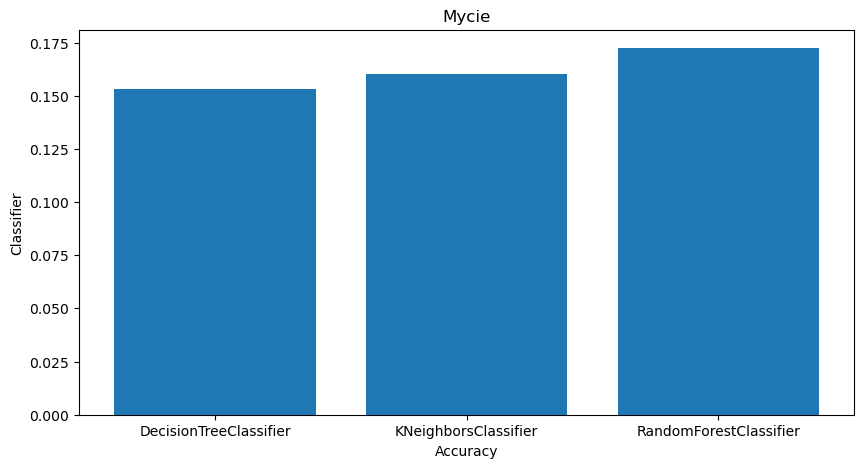

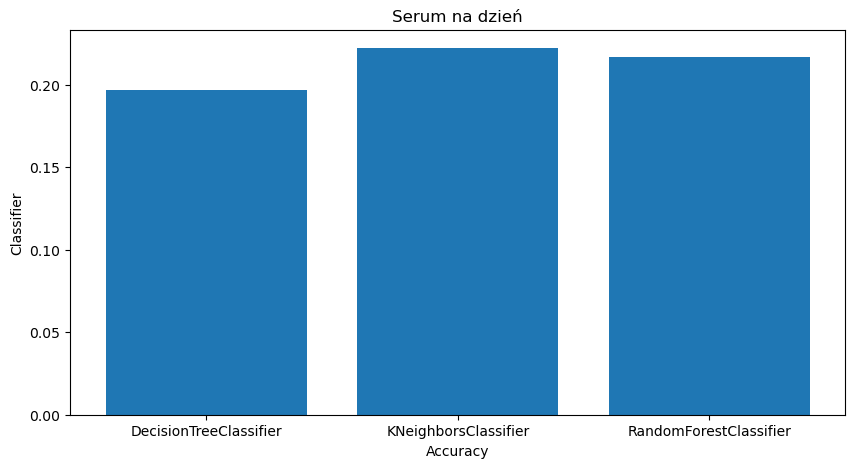

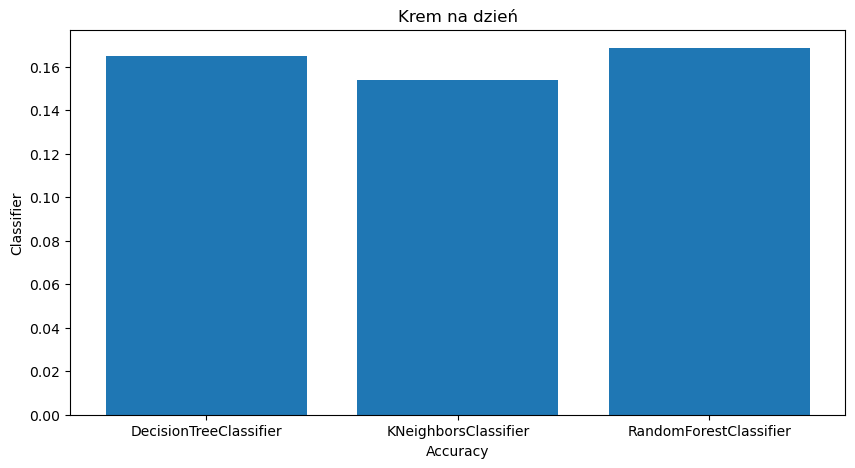

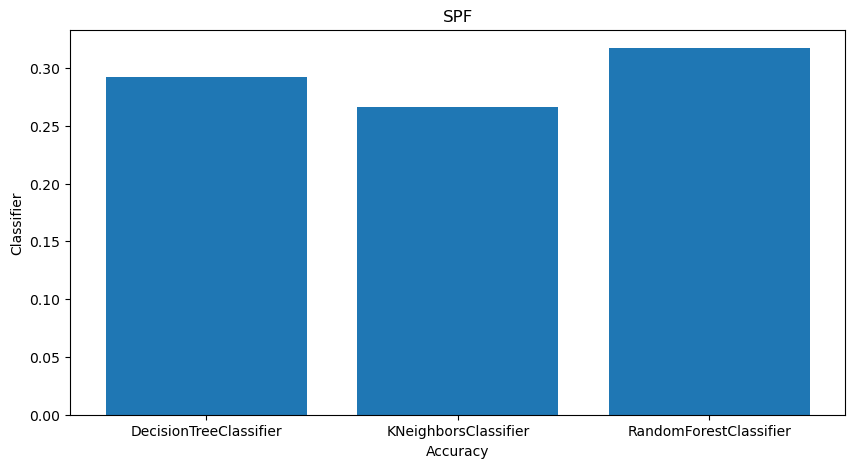

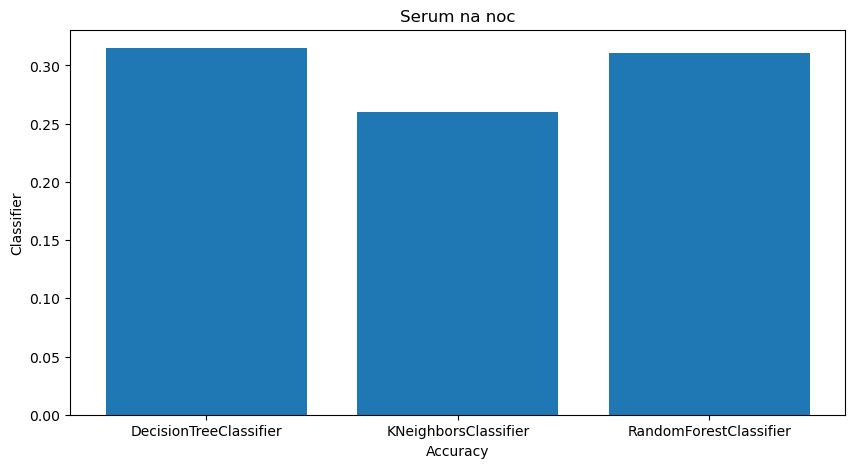

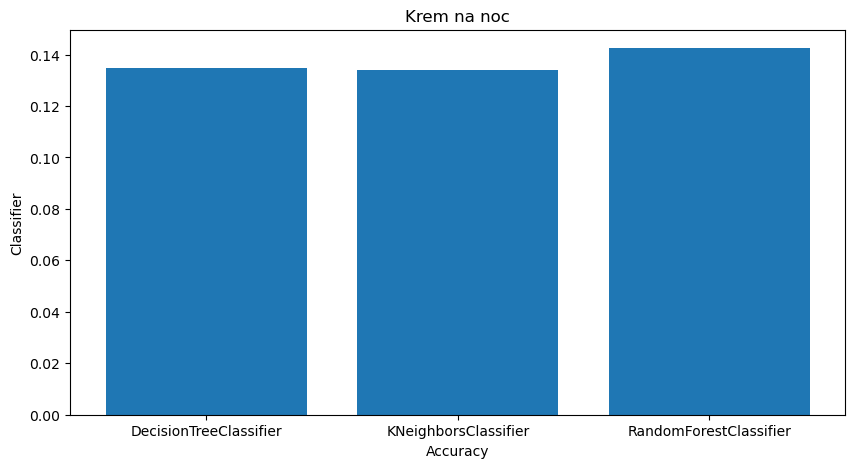

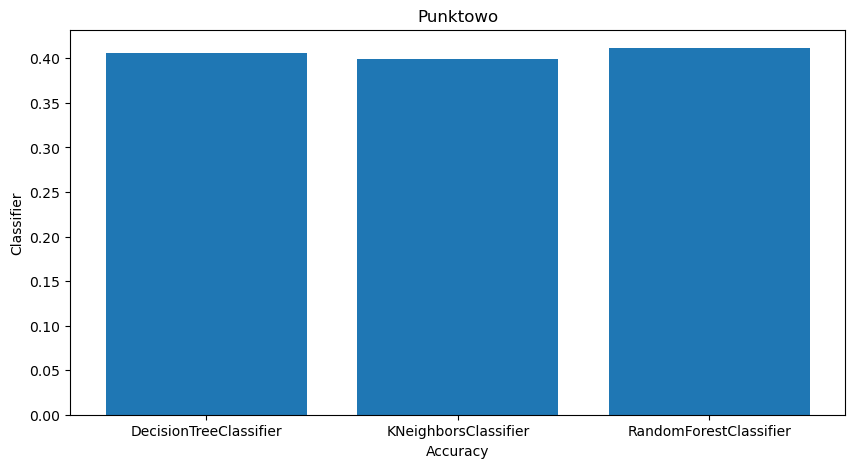

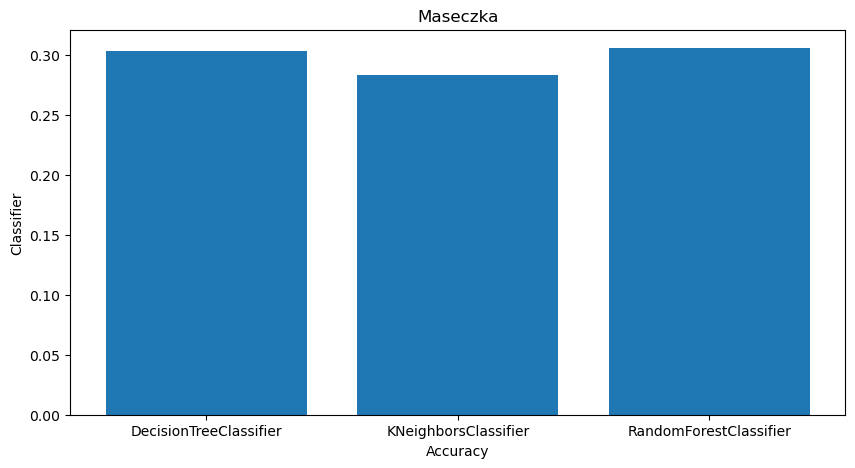

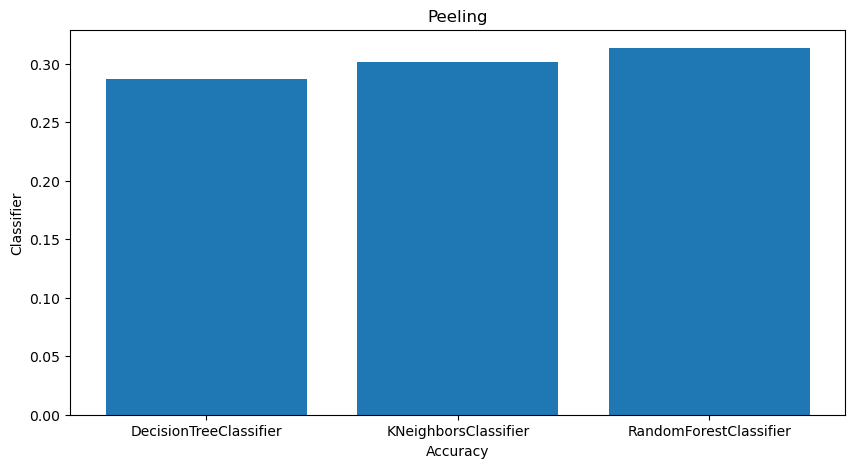

In [7]:
for key in accuracyDecisionTree:
    allAccuracy[key] = [accuracyDecisionTree[key], accuracyKNN[key], accuracyRandomForest[key]]

import matplotlib.pyplot as plt
import numpy as np

for key in allAccuracy:
    plt.figure(figsize=(10, 5))
    plt.title(key)
    plt.xlabel('Accuracy')
    plt.ylabel('Classifier')
    plt.bar(['DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier'], allAccuracy[key])
    plt.show()

In [8]:
def read_models_for_analysis(filename, i):
    temp_dict = {}
    with open("../models_for_analysis/{0}/{1}".format(i, filename), "rb") as file:
        temp_dict[filename] = pickle.load(file)
    return temp_dict

Wyświetlenie wszystkich najlepszych modeli i ich parametrów

In [9]:
for i in range(9):
    temp_list = [read_models_for_analysis(filename, i) for filename in os.listdir('../models_for_analysis/{0}'.format(i))]
    models[i] = temp_list
models

c:\Users\CEM\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\CEM\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or inva

{0: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=8)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(n_neighbors=19)},
  {'RandomForestClassifier.hdf5': RandomForestClassifier(criterion='entropy', max_depth=38, min_samples_leaf=9,
                          min_samples_split=3, n_estimators=200)}],
 1: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=8,
                          min_samples_split=5)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(n_neighbors=18)},
  {'RandomForestClassifier.hdf5': RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                          min_samples_split=9, n_estimators=400)}],
 2: [{'DecisionTreeClassifier.hdf5': DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)},
  {'KNeighborsClassifier.hdf5': KNeighborsClassifier(metric='manhattan', n_neighbors=19)},
  {'RandomF